In [1]:
using NCDatasets
using CairoMakie

In [2]:
rootdir = "../data/processed_output/"
filelist = [e for e in readdir(rootdir) if e[1]!="."[1]]

4-element Vector{String}:
 "shear_instability_TKE_Ri=0.001.nc"
 "shear_instability_TKE_Ri=0.1.nc"
 "shear_instability_TKE_Ri=0.3.nc"
 "shear_instability_TKE_Ri=0.5.nc"

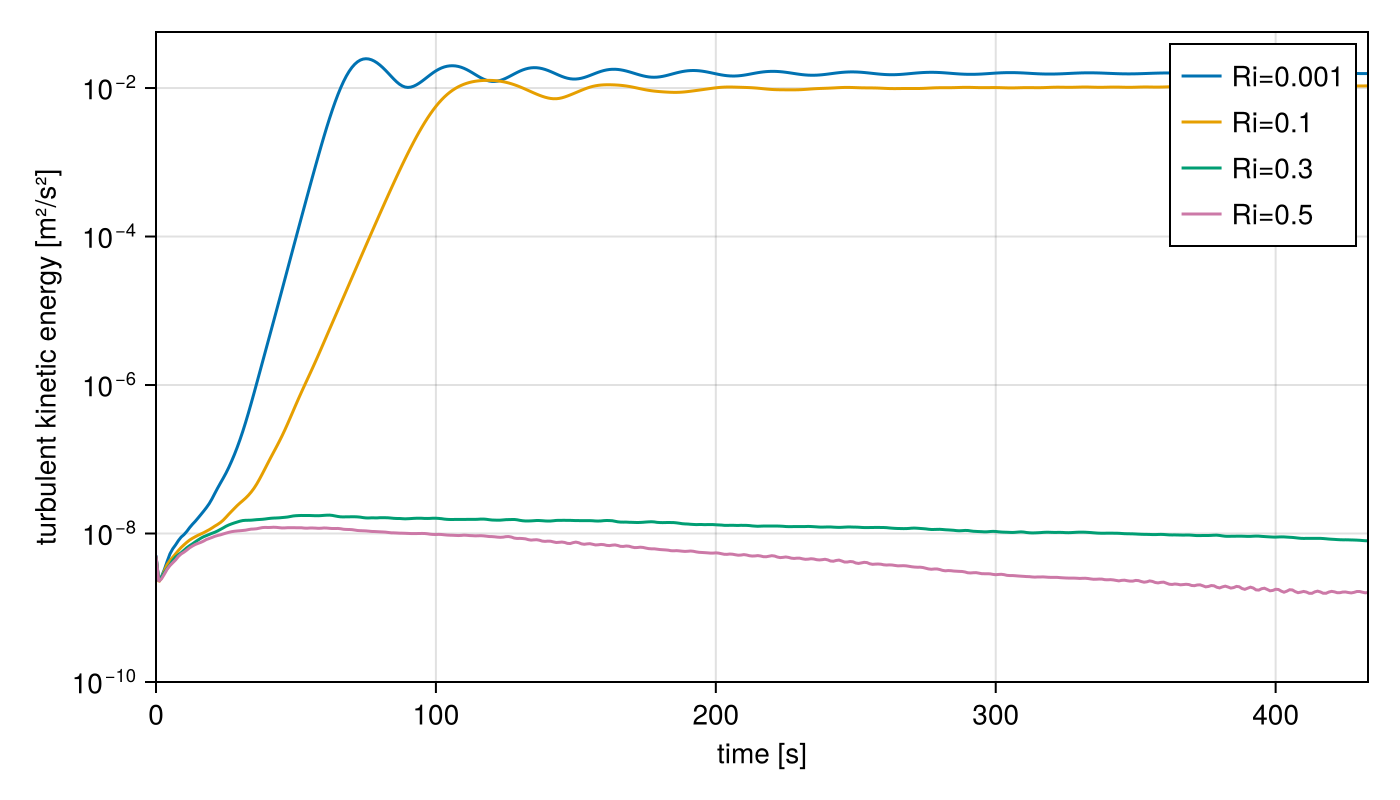

In [7]:
ds_ex = NCDataset(string(rootdir, filelist[1]), "r")
fig = Figure(size = (700, 400))
ax = Axis(
    fig[1, 1], xlabel = "time [s]", ylabel = "turbulent kinetic energy [m²/s²]",
    limits=((0, ds_ex["time"][end]), (1e-10, nothing)), yscale=log10
)
close(ds_ex)

for file in filelist
    ds = NCDataset(string(rootdir, file), "r")
    lines!(ax, ds["time"], ds["TKE"], label=string("Ri=",ds.attrib["Ri"]))
    close(ds)
end
axislegend(ax)
fig